<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Decision Trees


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


if you uisng you own version comment out


In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])

In [3]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [5]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
await download(path,"drug200.csv")
path="drug200.csv"

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


Now, read the data using pandas dataframe:


In [6]:
my_data = pd.read_csv(path, delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
my_data.to_csv('module_9_drugs.csv')

<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [8]:
# write your code here

print('Dataframe Shape:', my_data.shape)
print('Dataframe Size:', my_data.size)
print('Dataframe ndim:', my_data.ndim)

Dataframe Shape: (200, 6)
Dataframe Size: 1200
Dataframe ndim: 2


<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>



<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [9]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values # turns the data frame into a numpy.ndarray without columns and instead simply displays the values within those columns
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [10]:
type(X)

numpy.ndarray

As you may figure out, some features in this dataset are categorical, such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using __LabelEncoder__
to convert the categorical variable into numerical variables.


In [11]:
from sklearn import preprocessing
# X[:,1] --> : --> indicates that it should include all rows; 1 --> selects column 1 "Sex" (column 0 is "Age")
# One-Hot-Encoding could be used instead as well
# But since not more than three categories (the highest amount has BloodPressure, with 3-->Low,Normal,High), .LabelEncoder() is fine to use

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) # converts/transforms column 1 "Sex" (column 0 is "Age") that contains the values "F", "M" with LabelEncoder to 0 and 1 instead

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2]) # converts/transforms column 2 "Bloospressure" (column 0 is "Age") that contains the values "Low", "Normal", "High" with LabelEncoder to 0, 1, 2 instead

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) # converts/transforms column 3 "Cholesterol" (column 0 is "Age") that contains the values "Normal", "High" with LabelEncoder to 0 and 1 instead

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
X2 = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X2[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [13]:
X2[1,:]

array([47, 'M', 'LOW', 'HIGH', 13.093], dtype=object)

In [14]:
X2[3,:]

array([28, 'F', 'NORMAL', 'HIGH', 7.798], dtype=object)

In [15]:
X2[3]

array([28, 'F', 'NORMAL', 'HIGH', 7.798], dtype=object)

In [16]:
X2[1,:2]

array([47, 'M'], dtype=object)

In [17]:
X2[1:2]

array([[47, 'M', 'LOW', 'HIGH', 13.093]], dtype=object)

In [18]:
X2[2]

array([47, 'M', 'LOW', 'HIGH', 10.114], dtype=object)

In [19]:
X2[0]

array([23, 'F', 'HIGH', 'HIGH', 25.355], dtype=object)

In [20]:
X2[1,2]

'LOW'

In [21]:
X2[:,1]

array(['F', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F',
       'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M',
       'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F

In [22]:
X2[:,1][0:5] # "Sex" feature column

array(['F', 'M', 'M', 'F', 'F'], dtype=object)

In [23]:
X2[:,2][0:5] # "

array(['HIGH', 'LOW', 'LOW', 'NORMAL', 'LOW'], dtype=object)

In [24]:
X2[:,3][0:5]

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'], dtype=object)

Now we can fill the target variable.


In [25]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [26]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [28]:
# your code

print("Shape of X training set:", x_train.shape)
print("Shape of Y training set:", y_train.shape)

Shape of X training set: (140, 5)
Shape of Y training set: (140,)


In [29]:
print('Shape of X training set {}'.format(x_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [30]:
x_train[0:3]

array([[26, 0, 0, 1, 19.161],
       [41, 0, 2, 1, 22.905],
       [28, 0, 2, 0, 19.675]], dtype=object)

In [31]:
y_train[0:3]

77    drugY
73    drugY
71    drugY
Name: Drug, dtype: object

<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>



Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [32]:
# your code

print("Shape of X training set:", x_test.shape)
print("Shape of Y training set:", y_test.shape)

Shape of X training set: (60, 5)
Shape of Y training set: (60,)


In [33]:
print("Shape of X test set {}".format(x_test.shape),"&","Shape of Y test set {}".format(y_test.shape))

Shape of X test set (60, 5) & Shape of Y test set (60,)


<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>



<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [34]:
# own note: max_depth
# The maximum depth that you allow the tree to grow to. Here: can have up to 4 levels of splits
# The deeper you allow, the more complex your model will become.  For training error, it is easy to see what will happen. 
# If you increase max_depth, training error will always go down and hence accuracy will be more for training set .  
# However for testing set the accuracy will be less.   
# If you set max_depth too high , then the decision tree might simply overfit the training data without capturing useful patterns as we would like; 
# this will cause testing error to increase.   But if you set it too low , that is not good as well; then you might be giving the decision tree too 
# little flexibility to capture the patterns and interactions in the training data.   So even though you may get lesser testing error and high accuracy 
# here you may have underfitted the data.
# Here both overfitting and underfitting are the problems.  A lower depth does not indicate higher accuracy.
# Usually, the modeller would consider the max_depth as a hyper-parameter, and use some sort of grid/random search with cross-validation to find a 
# good number for max_depth
# https://www.coursera.org/learn/machine-learning-with-python/discussions/forums/46O6SKSLEeyBoBL7F1DbTw/threads/05ENYm1gEe2HBw67Q7_Bow
# https://www.coursera.org/learn/machine-learning-with-python/discussions/forums/46O6SKSLEeyBoBL7F1DbTw/threads/z235DCE4Ee6kKxILEyYEPw

# 4 = equals the amount of columns - 1 (-1 because it starts off of one of the columns and grows 4 from there (4=the remaining columns)
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [35]:
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [36]:
predTree = drugTree.predict(x_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [37]:
print(predTree [0:5])
print(y_test [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [38]:
from sklearn.metrics import accuracy_score
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Let's visualize the tree
</div>


In [39]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [40]:
import matplotlib.pyplot as plt

In [41]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [42]:
y.values[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

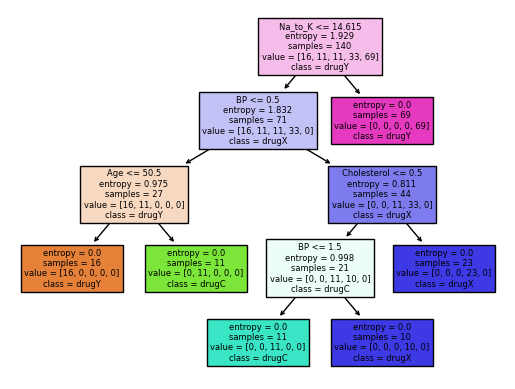

In [43]:
tree.plot_tree(drugTree, feature_names=my_data.columns, class_names=y.values, filled=True)
plt.show()

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-04-05  | 2.3  | Anita Verma   | Changed pandas.get_dummies() to LabelEncoder|
| 2020-11-20  | 2.2  | Lakshmi  | Changed import statement of StringIO|
| 2020-11-03  | 2.1  | Lakshmi  | Changed URL of the csv            |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
